In [34]:
import numpy as np
import pandas as pd

import fastf1 as ff1
from fastf1 import plotting

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [35]:
ff1.Cache.enable_cache("cache")

test = ff1.get_session(2022, "Jeddah", 3)
test.load(telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 3 [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '27', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '4', '3', '63', '77']


In [36]:
fastest_perez = test.laps.pick_driver("PER").pick_fastest().get_car_data().add_distance()
fastest_sainz = test.laps.pick_driver("SAI").pick_fastest().get_car_data().add_distance()
fastest_gasly = test.laps.pick_driver("GAS").pick_fastest().get_car_data().add_distance()
fastest_alonso = test.laps.pick_driver("ALO").pick_fastest().get_car_data().add_distance()

fastest_sainz["DRIVER"] = "Sainz"
fastest_perez["DRIVER"] = "Perez"
fastest_gasly["DRIVER"] = "Gasly"
fastest_alonso["DRIVER"] = "Alonso"

In [37]:
speed_analysis = pd.concat([fastest_perez, fastest_sainz, fastest_gasly, fastest_alonso], axis=0)[["Speed", "Distance", "Throttle", "DRIVER"]]

In [38]:
speed_analysis

,Speed,Distance,Throttle,DRIVER
0,305,9.658333,100,Perez
1,307,36.947222,100,Perez
2,309,60.980556,100,Perez
3,311,85.169444,100,Perez
4,313,109.513889,100,Perez
...,...,...,...,...
329,294,6016.216389,100,Alonso
330,296,6042.527500,100,Alonso
331,298,6059.083056,100,Alonso
332,299,6079.016389,100,Alonso


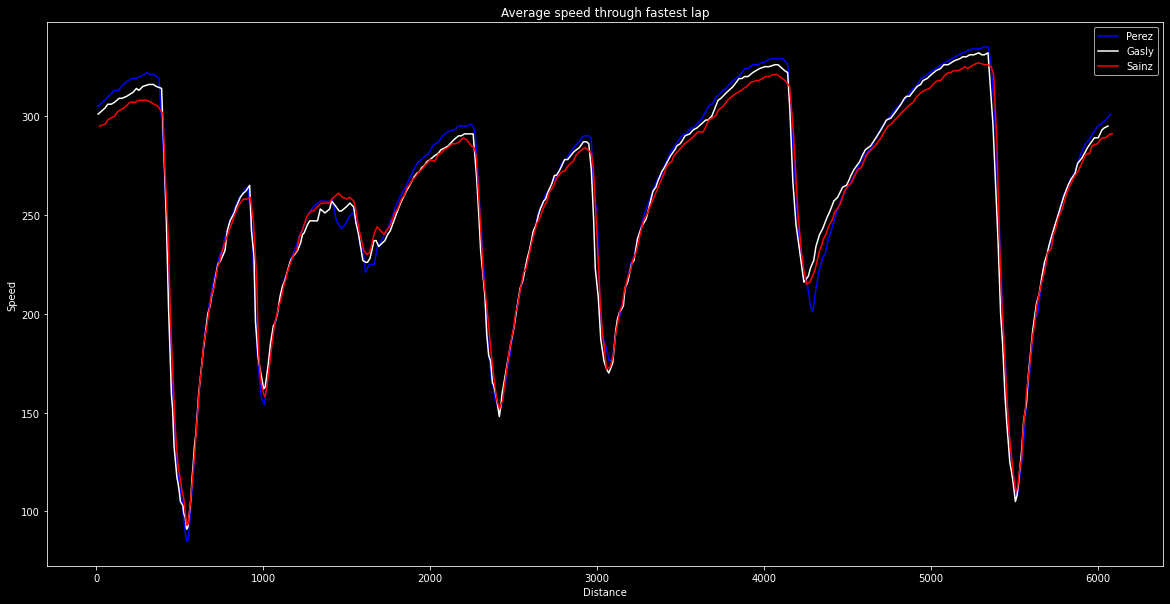

In [39]:
plt.style.use("dark_background")

plt.figure(figsize=(20,10))
plt.plot(speed_analysis[speed_analysis.DRIVER == "Perez"]["Distance"], speed_analysis[speed_analysis.DRIVER == "Perez"]["Speed"], color="blue")
plt.plot(speed_analysis[speed_analysis.DRIVER == "Gasly"]["Distance"], speed_analysis[speed_analysis.DRIVER == "Gasly"]["Speed"], color="white")
plt.plot(speed_analysis[speed_analysis.DRIVER == "Sainz"]["Distance"], speed_analysis[speed_analysis.DRIVER == "Sainz"]["Speed"], color="red")
# plt.plot(speed_analysis[speed_analysis.DRIVER == "Alonso"]["Distance"], speed_analysis[speed_analysis.DRIVER == "Alonso"]["Speed"], color="pink")
plt.legend(["Perez", "Gasly", "Sainz", "Alonso"])
plt.xlabel("Distance")
plt.ylabel("Speed")
plt.title("Average speed through fastest lap")
plt.show()

In [40]:
pos = test.laps.pick_driver("PER").get_pos_data()

pos

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2022-03-26 14:17:36.497,OnTrack,-2397,3043,0,pos,0 days 00:00:00.180000,0 days 00:32:36.488000
1,2022-03-26 14:17:36.956,OnTrack,-2422,3114,0,pos,0 days 00:00:00.639000,0 days 00:32:36.947000
2,2022-03-26 14:17:37.056,OnTrack,-2429,3137,0,pos,0 days 00:00:00.739000,0 days 00:32:37.047000
3,2022-03-26 14:17:37.256,OnTrack,-2446,3185,0,pos,0 days 00:00:00.939000,0 days 00:32:37.247000
4,2022-03-26 14:17:37.536,OnTrack,-2471,3257,0,pos,0 days 00:00:01.219000,0 days 00:32:37.527000
...,...,...,...,...,...,...,...,...
11138,2022-03-26 15:05:59.603,OnTrack,-1228,-369,122,pos,0 days 00:48:23.286000,0 days 01:20:59.594000
11139,2022-03-26 15:06:00.042,OnTrack,-1261,-240,122,pos,0 days 00:48:23.725000,0 days 01:21:00.033000
11140,2022-03-26 15:06:00.443,OnTrack,-1280,-186,122,pos,0 days 00:48:24.126000,0 days 01:21:00.434000
11141,2022-03-26 15:06:00.503,OnTrack,-1284,-173,122,pos,0 days 00:48:24.186000,0 days 01:21:00.494000
